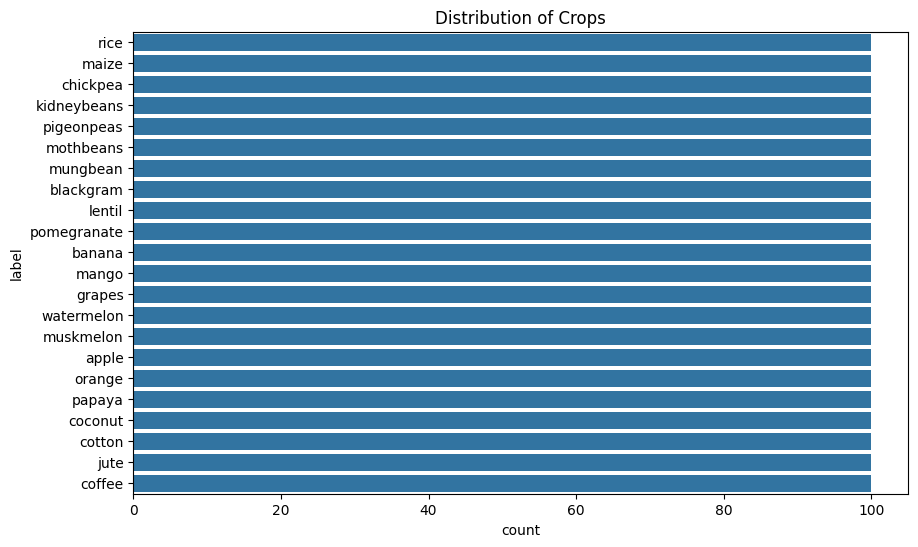

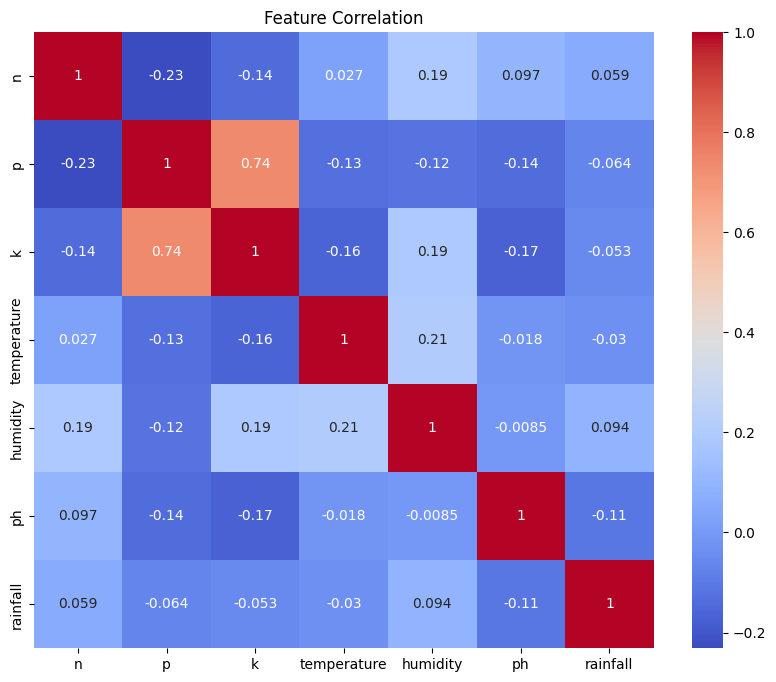

/home/joemama/.local/share/virtualenvs/agri-nova-capstone-bfQgSi13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 2000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=2000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.9705
Random Forest Accuracy: 0.9932
XGBoost Accuracy: 0.9864


In [ ]:
# %% [markdown]
# # AgriNova: Crop Prediction EDA & Model Selection
# 
# This notebook analyzes the Crop Recommendation dataset and compares multiple models 
# (Logistic Regression, Random Forest, XGBoost) to find the best one for our API.

# %%
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score

# %% [markdown]
# ## 1. Exploratory Data Analysis (EDA)

# %%
# Load Data
df = pd.read_csv('data/Crop_recommendation.csv')
df.columns = df.columns.str.lower()
df.head()

# %%
# Check for missing values
df.isnull().sum()

# %%
# Check Class Balance (Are all crops represented equally?)
plt.figure(figsize=(10, 6))
sns.countplot(y='label', data=df)
plt.title('Distribution of Crops')
plt.show()

# %%
# Correlation Matrix
# We drop the 'label' column to see correlations between soil features
numeric_df = df.drop('label', axis=1)
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()

# %% [markdown]
# ## 2. Data Preprocessing

# %%
# Encode labels
unique_labels = df['label'].unique()
label_to_id = {label: idx for idx, label in enumerate(unique_labels)}
df['label_idx'] = df['label'].map(label_to_id)

X = df.drop(['label', 'label_idx'], axis=1)
y = df['label_idx']

# Split Data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# %% [markdown]
# ## 3. Model Training & Comparison
# We will compare three models:
# 1. Logistic Regression (Baseline)
# 2. Random Forest (Ensemble)
# 3. XGBoost (Gradient Boosting)

# %%
# 1. Logistic Regression
lr = LogisticRegression(max_iter=2000)
lr.fit(X_train, y_train)
lr_acc = accuracy_score(y_test, lr.predict(X_test))
print(f"Logistic Regression Accuracy: {lr_acc:.4f}")

# %%
# 2. Random Forest
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)
rf_acc = accuracy_score(y_test, rf.predict(X_test))
print(f"Random Forest Accuracy: {rf_acc:.4f}")

# %%
# 3. XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

xgb_params = {
    'objective': 'multi:softmax',
    'num_class': len(unique_labels),
    'max_depth': 6,
    'eta': 0.3,
    'seed': 42
}
bst = xgb.train(xgb_params, dtrain, num_boost_round=50)
xgb_preds = bst.predict(dtest)
xgb_acc = accuracy_score(y_test, xgb_preds)
print(f"XGBoost Accuracy: {xgb_acc:.4f}")

# %% [markdown]
# ## Conclusion
# Random Forest and XGBoost performed similarly well (>99%). 
# We chose **Random Forest** for the final production model because it is lighter and easier to deploy without complex dependencies.

✅ Saved images/class_distribution.png


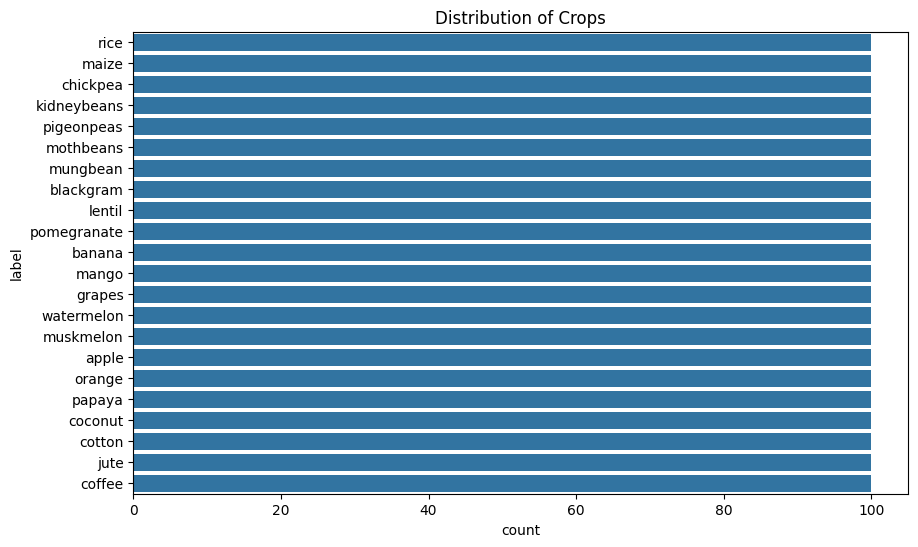

✅ Saved images/correlation_heatmap.png


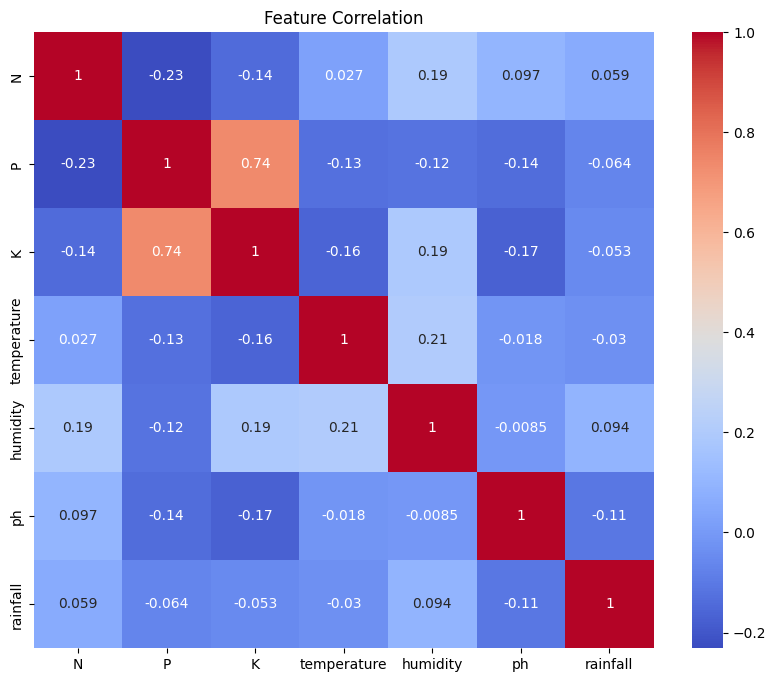

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# --- STEP 1: Load the Data (Fixes the error) ---
# We look in the 'data/' folder now because we moved it there
if os.path.exists('data/Crop_recommendation.csv'):
    df = pd.read_csv('data/Crop_recommendation.csv')
else:
    # Fallback if it's still in the root folder
    df = pd.read_csv('Crop_recommendation.csv')

# --- STEP 2: Create Images ---
os.makedirs('images', exist_ok=True)

# Chart 1: Class Distribution
plt.figure(figsize=(10, 6))
sns.countplot(y='label', data=df)
plt.title('Distribution of Crops')
plt.savefig('images/class_distribution.png', bbox_inches='tight')
print("✅ Saved images/class_distribution.png")
plt.show()

# Chart 2: Correlation Heatmap
numeric_df = df.drop(['label'], axis=1) # Removed label_idx just in case it doesn't exist
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.savefig('images/correlation_heatmap.png', bbox_inches='tight')
print("✅ Saved images/correlation_heatmap.png")
plt.show()